# Introduction
<hr style = "border:2px solid black" ></hr>


**What?** Predicting red-wine quality with ANNs and early stopping



# Import modules
<hr style = "border:2px solid black" ></hr>

In [1]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib as mpl
from tensorflow import keras
from tensorflow.keras import layers, callbacks

rcParams['figure.figsize'] = 17, 8
rcParams['font.size'] = 20

# Import dataset
<hr style = "border:2px solid black" ></hr>


- We'll use the *Red Wine Quality* dataset.
- This dataset consists of physiochemical measurements from about 1600 Portuguese red wines. 
- Also included is a quality rating for each wine from blind taste-tests. 
- How well can we predict a wine's perceived quality from these measurements?



In [2]:
red_wine = pd.read_csv('../DATASETS/winequality-red.csv')

# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


In [3]:
print(X_train.shape)

(1119, 11)


# Building the ANNs
<hr style = "border:2px solid black" ></hr>


- We've chosen a three-layer network with over 1500 neurons. 
- This network should be capable of learning fairly complex relationships in the data. 



In [4]:
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

In [5]:
model.compile(
    optimizer='adam',
    loss='mae',
)

In [6]:
early_stopping = callbacks.EarlyStopping(
    # Minimium amount of change to count as an improvement
    min_delta=0.001, 
    # How many epochs to wait before stopping
    patience = 50, 
    restore_best_weights=True,
)


- We'll feed the optimizer 256 rows of the training data at a time (the batch_size) and to do that 10 times all the way through the dataset (the epochs).



In [7]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size = 256,
    epochs = 500,
    callbacks = [early_stopping],
    verbose = 1,  
)

Epoch 1/500
5/5 [==============================] - 1s 46ms/step - loss: 0.2738 - val_loss: 0.1368
Epoch 2/500
5/5 [==============================] - 0s 12ms/step - loss: 0.1343 - val_loss: 0.1236
Epoch 3/500
5/5 [==============================] - 0s 12ms/step - loss: 0.1244 - val_loss: 0.1210
Epoch 4/500
5/5 [==============================] - 0s 12ms/step - loss: 0.1144 - val_loss: 0.1065
Epoch 5/500
5/5 [==============================] - 0s 12ms/step - loss: 0.1093 - val_loss: 0.1037
Epoch 6/500
5/5 [==============================] - 0s 12ms/step - loss: 0.1068 - val_loss: 0.1101
Epoch 7/500
5/5 [==============================] - 0s 12ms/step - loss: 0.1046 - val_loss: 0.1010
Epoch 8/500
5/5 [==============================] - 0s 12ms/step - loss: 0.1019 - val_loss: 0.1061
Epoch 9/500
5/5 [==============================] - 0s 12ms/step - loss: 0.1022 - val_loss: 0.1006
Epoch 10/500
5/5 [==============================] - 0s 12ms/step - loss: 0.1006 - val_loss: 0.1002
Epoch 11/500
5/5 [=

Epoch 84/500
5/5 [==============================] - 0s 12ms/step - loss: 0.0751 - val_loss: 0.0925
Epoch 85/500
5/5 [==============================] - 0s 12ms/step - loss: 0.0698 - val_loss: 0.0941
Epoch 86/500
5/5 [==============================] - 0s 12ms/step - loss: 0.0683 - val_loss: 0.0933
Epoch 87/500
5/5 [==============================] - 0s 12ms/step - loss: 0.0704 - val_loss: 0.0923
Epoch 88/500
5/5 [==============================] - 0s 11ms/step - loss: 0.0683 - val_loss: 0.0925
Epoch 89/500
5/5 [==============================] - 0s 11ms/step - loss: 0.0664 - val_loss: 0.0944
Epoch 90/500
5/5 [==============================] - 0s 11ms/step - loss: 0.0661 - val_loss: 0.0955
Epoch 91/500
5/5 [==============================] - 0s 11ms/step - loss: 0.0656 - val_loss: 0.0923
Epoch 92/500
5/5 [==============================] - 0s 11ms/step - loss: 0.0641 - val_loss: 0.0945
Epoch 93/500
5/5 [==============================] - 0s 11ms/step - loss: 0.0659 - val_loss: 0.0948
Epoch 94/5

Minimum validation loss: 0.09073387831449509


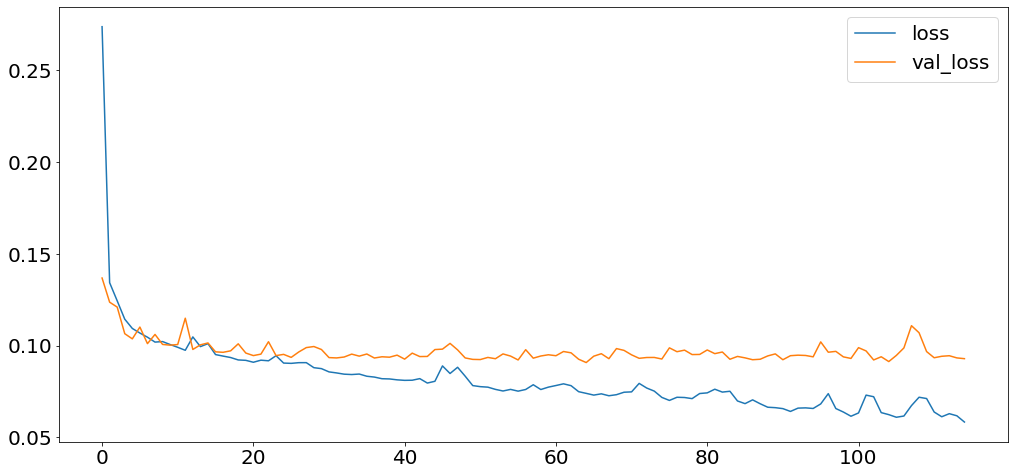

In [8]:
# Convert the training history to a dataframe and plot
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))


- Notice how the loss levels off as the epochs go by. 
- When the loss curve becomes horizontal like that, it means the model has learned all it can and there would be no reason continue for additional epochs.
- Please note that if we did not use early stopping the model would have gone all the way to 500 probably overfitting.



# References
<hr style = "border:2px solid black" ></hr>


- https://www.kaggle.com/ryanholbrook/stochastic-gradient-descent

